In [21]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def _random_subset(seq, m):
    """Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.

    Note: rng is a random.Random or numpy.random.RandomState instance.
    """
    targets = set()
    while len(targets) < m:
        x = random.choice(seq)
        targets.add(x)
    return targets

In [14]:
def star_graph(n):
    """Return the star graph

    The star graph consists of one center node connected to n outer nodes.

    Parameters
    ----------
    n : int or iterable
        If an integer, node labels are 0 to n with center 0.

    Notes
    -----
    The graph has n+1 nodes.
    """
    
    nodes = range(n + 1)
    G = nx.Graph()
    G.add_nodes_from(nodes)

    if len(nodes) > 1:
        hub, *spokes = nodes
        G.add_edges_from((hub, node) for node in spokes)
    return G

In [15]:
def barabasi_albert_graph(n, m, gamma):
    """Returns a random graph using Barabási–Albert preferential attachment

    A graph of $n$ nodes is grown by attaching new nodes each with $m$
    edges that are preferentially attached to existing nodes with high degree.

    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes

    Returns
    -------
    G : Graph

    Raises
    ------
    NetworkXError
        If `m` does not satisfy ``1 <= m < n``

    References
    ----------
    .. [1] A. L. Barabási and R. Albert "Emergence of scaling in
       random networks", Science 286, pp 509-512, 1999.
    """

    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}"
        )

    alpha = 1 / (gamma - 1)

    # Default initial graph : star graph on (m + 1) nodes
    G = star_graph(m)

    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = [n for n, d in G.degree() for _ in range(d)]
    # Start adding the other nodes.
    source = len(G)
    while source < n:
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m)
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)

        source += 1
    return G

In [16]:
G = barabasi_albert_graph(100000, 3)

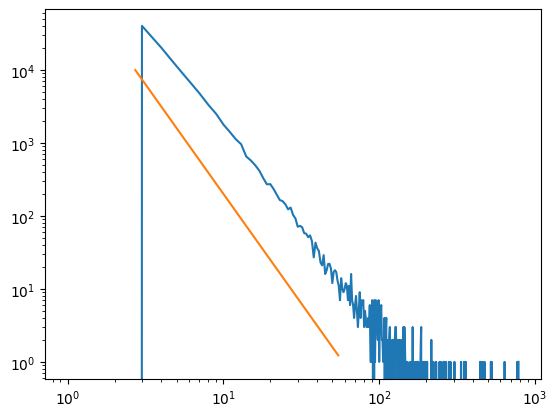

In [23]:
plt.loglog(nx.degree_histogram(G))
plt.plot(np.exp(np.arange(1, np.log10(len(G)))), 200000 * np.exp(-3 * np.arange(1, np.log10(len(G)))))